In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
# 加载imdb数据
(train_data, train_labels), (test_data, test_labels) = imdb.load_data('/temp/keras/imdb.npz', num_words=10000)

In [3]:
# train_data[0], train_labels[0]
print(train_data.shape)
print(test_data.shape)

(25000,)
(25000,)


In [4]:
# 根据单词索引得到评论原文
# word_index
word_index = imdb.get_word_index('/temp/keras/imdb_word_index.json')
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decode_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
import numpy as np

# 单词序列向量化
def vectorize_sequences(sequences, dimension=10000):
    # 初始化zero矩阵
    results = np.zeros((len(sequences), dimension))
    # 索引相对应的元素置浮点数 1.0
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [6]:
# 训练和测试数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])

# 将标注数据转化为浮点数
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train)

[0. 1. 1. ... 0. 0. 0.]
[1. 0. 0. ... 0. 1. 0.]


In [7]:
from keras import models
from keras import layers

# 构建模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
x_train.shape

(25000, 10000)

In [9]:
# 取训练集前10000条数据做验证集
# 训练时验证集不会更新权重，可用于观察loss是否下降，判断是否出现过拟合
x_val = x_train[:10000]
y_val = y_train[:10000]

# 取后15000条数据作为实际的训练数据集
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [10]:
# 编译模型
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# 训练模型，用训练集后15000条数据训练，并用后10000条验证
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3794 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3003 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.2179 - acc: 0.9287 - val_loss: 0.3087 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1750 - acc: 0.9439 - val_loss: 0.2841 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1427 - acc: 0.9542 - val_loss: 0.2841 - val_acc: 0.8871
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3161 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.0979 - acc: 0.9707 - val_loss: 0.3128 - val_ac

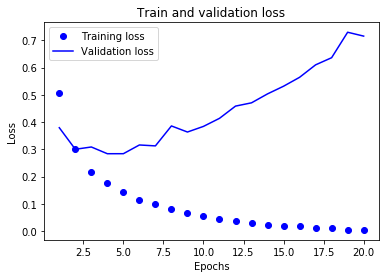

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

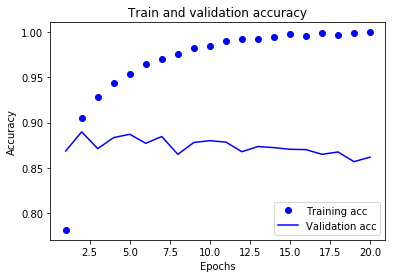

In [12]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.4750 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.2654 - acc: 0.9099
Epoch 3/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.1983 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.1676 - acc: 0.9406


In [14]:
result = model2.evaluate(x_test, y_test)
print(result)

25000/25000 [==============================] - 2s 66us/step
[0.3232270453262329, 0.87316]


In [15]:
predictions = model2.predict(x_test)
print(predictions)

[[0.14075306]
 [0.99969494]
 [0.3001542 ]
 ...
 [0.07069581]
 [0.04360213]
 [0.4713325 ]]
